# Clustering

### Prepare the data

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)
X = mnist['data']
y = mnist['target']

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Dictionary with model with k-clusters and silhouette score
k_to_sil = {}

for i in range (8, 13):
  km = KMeans(n_clusters=i, n_init=10)
  km.fit(X)
  sil_score = silhouette_score(X, km.labels_)
  k_to_sil[i] = sil_score
  print(f"Dla k={i}, score = {sil_score}")

Dla k=8, score = 0.0733900821480227
Dla k=9, score = 0.056839236161693604
Dla k=10, score = 0.058700075731867606
Dla k=11, score = 0.058316043158220844
Dla k=12, score = 0.05820244787066735


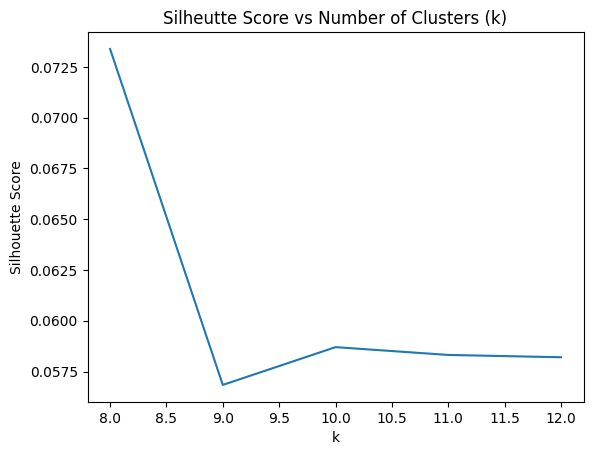

In [4]:
# visualization of silhouette score depending on k
plt.plot(k_to_sil.keys(), k_to_sil.values())
plt.title("Silheutte Score vs Number of Clusters (k)")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [5]:
# Saving results to pickle file
import pickle
sil_list = list(k_to_sil.values())
with open("kmeans_sil.pkl", 'wb') as file:
    pickle.dump(sil_list, file)

Można zobaczyć, że możlia jest wersja o zidentyfikowaniu 10 różnych znaków (co by potwierdzała intuicja), lecz najwięszy silhouette score jest dla k = 8

In [6]:
from sklearn.metrics import confusion_matrix

# Macierz błędów dla w procesie klasteryzacji dla 10 skupisk
km_10 = KMeans(n_clusters=10, n_init=10)
y_predicted = km_10.fit_predict(X)

conf_matrix = confusion_matrix(y, y_predicted)

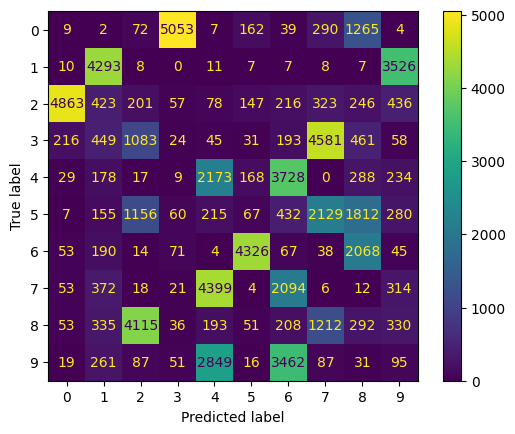

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot()


In [8]:
max_indexes = [np.argmax(row) for row in conf_matrix]
unique_sorted_list = sorted(set(max_indexes))
print(unique_sorted_list)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


In [9]:
with open("kmeans_argmax.pkl", "wb") as file:
    pickle.dump(unique_sorted_list, file)

### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
X_new = X[:300]
all_distances = []

for i in range(300):
    distances = np.linalg.norm(X - X_new[i], axis=1)
    distances = distances[distances != 0] # without 0
    all_distances.append(distances)

all_distances = np.concatenate(all_distances)
top_10 = np.sort(all_distances)[:10]


In [11]:
top_10

array([279.26152617, 304.3764117 , 317.5893575 , 328.76587414,
       333.45464459, 352.89800226, 355.17742045, 358.0740147 ,
       359.64287842, 360.42474943])

In [12]:
with open("dist.pkl", "wb") as file:
    pickle.dump(top_10, file)

In [13]:
# as our eps we will take values from s to s + 10%*s where s = average from our 3 lowest numbers from top_10 list
s = np.average(top_10[:3])
s

np.float64(300.40909845916684)

In [14]:
eps_list = []
eps = s
while eps < s + 0.1*s:
    eps_list.append(eps)
    eps += 0.04*s
print(eps_list)

[np.float64(300.40909845916684), np.float64(312.4254623975335), np.float64(324.4418263359002)]


In [15]:
# clustering based on  eps and saving number of unique labels to list
unique_labels = []
for eps in eps_list:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X)
    unique_labels.append(len(np.unique(dbscan.labels_)))
unique_labels

[4, 7, 22]

In [16]:
with open("dbscan_len.pkl", "wb") as file:
    pickle.dump(unique_labels, file)